## Linear Regression
Predicting overnight stay in Berlin at Airbnb

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

#Make results reproducible
np.random.seed(400)
random.seed(400)

### Load data

In [40]:
Berlin = pd.read_csv('data/Berlin/tomslee_airbnb_berlin_1471_2017-07-21.csv')

In [41]:
Berlin.shape

(21864, 20)

In [42]:
Berlin.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,7935870,1471,41848444,Shared room,NaN,Berlin,NaN,Mitte,0,0.0,3,1.0,NaN,71.0,NaN,Moabiter Schlummermutter,2017-07-25 07:33:11.130011,52.524177,13.333871,0101000020E6100000672AC423F1AA2A405F28603B1843...
1,18339755,1471,2310164,Shared room,NaN,Berlin,NaN,Charlottenburg-Wilmersdorf,0,0.0,2,1.0,NaN,70.0,NaN,QUIET HIDEAWAY IN GORGEOUS NEIGHBOURHOOD,2017-07-25 07:33:11.126913,52.501426,13.304605,0101000020E61000006B65C22FF59B2A409BAE27BA2E40...
2,8135806,1471,21857190,Shared room,NaN,Berlin,NaN,Charlottenburg-Wilmersdorf,0,0.0,1,1.0,NaN,72.0,NaN,Hotel Pension Messe Estimated 1 bed,2017-07-25 07:33:11.118463,52.506546,13.291830,0101000020E6100000BDFBE3BD6A952A40B6F5D37FD640...
3,16610057,1471,99254090,Shared room,NaN,Berlin,NaN,Pankow,0,0.0,2,1.0,NaN,78.0,NaN,Gemütliche 1-Zimmerwohnung,2017-07-25 07:33:11.116341,52.534989,13.425347,0101000020E610000047E7FC14C7D92A40215C01857A44...
4,4718249,1471,7908994,Shared room,NaN,Berlin,NaN,Mitte,0,0.0,3,1.0,NaN,72.0,NaN,Cozy central apartment,2017-07-25 07:33:11.113631,52.535720,13.396983,0101000020E6100000CD22145B41CB2A4014E813799244...


In [43]:
Berlin.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

### Data preparation

In [44]:
# Drop features which do not have data and not important at this time
Berlin = Berlin.drop(['country','city','last_modified','borough', 'location','bathrooms', 'minstay'], axis = 1)

# Also drop irrelavant information for now
Berlin = Berlin.drop(['room_id','survey_id', 'host_id', 'name'], axis = 1)
Berlin.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,Mitte,0,0.0,3,1.0,71.0,52.524177,13.333871
1,Shared room,Charlottenburg-Wilmersdorf,0,0.0,2,1.0,70.0,52.501426,13.304605
2,Shared room,Charlottenburg-Wilmersdorf,0,0.0,1,1.0,72.0,52.506546,13.291830
3,Shared room,Pankow,0,0.0,2,1.0,78.0,52.534989,13.425347
4,Shared room,Mitte,0,0.0,3,1.0,72.0,52.535720,13.396983


In [45]:
Berlin.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000
mean,13.452982,2.693492,2.682400,1.176866,69.829583,52.510324,13.406278
std,28.183697,2.352259,1.498732,0.654905,64.584770,0.030623,0.055657
min,0.000000,0.000000,1.000000,0.000000,10.000000,52.345803,13.107266
25%,1.000000,0.000000,2.000000,1.000000,38.000000,52.489249,13.377338
50%,4.000000,4.500000,2.000000,1.000000,57.000000,52.509565,13.416614
75%,12.000000,5.000000,3.000000,1.000000,82.000000,52.533536,13.439149
max,423.000000,5.000000,16.000000,10.000000,3006.000000,52.651670,13.721424


In [46]:
Berlin.isnull().sum()

room_type               0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
latitude                0
longitude               0
dtype: int64

### Exploratory data analysis (EDA) 

/Users/rajesh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


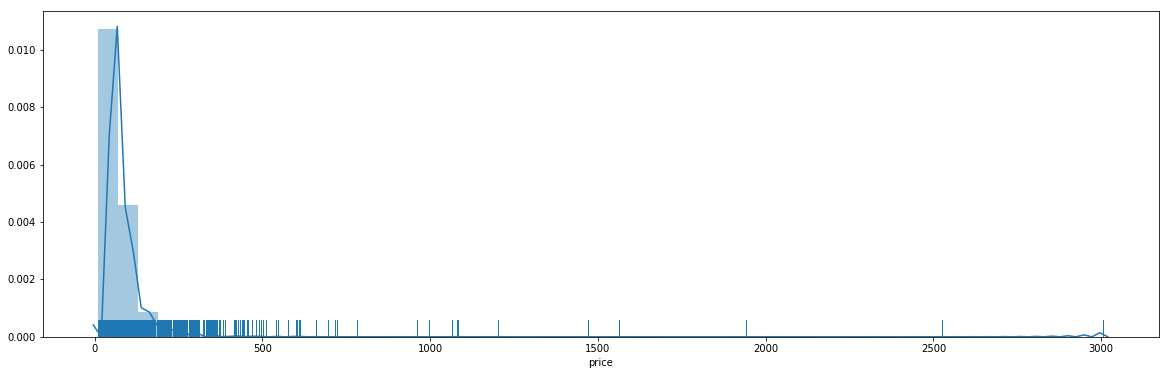

In [47]:
plt.figure(figsize=(20,6))
sns.distplot(Berlin['price'],rug=True)

### Questions:
1. How many different types of room?
2. Neighbourhoods in Berlin Airbnb?
3. Which room_type has higher price?

In [48]:
Berlin.room_type.unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

In [49]:
sorted(Berlin.neighborhood.unique())

['Charlottenburg-Wilmersdorf',
 'Friedrichshain-Kreuzberg',
 'Lichtenberg',
 'Marzahn-Hellersdorf',
 'Mitte',
 'Neukölln',
 'Pankow',
 'Reinickendorf',
 'Spandau',
 'Steglitz-Zehlendorf',
 'Tempelhof-Schöneberg',
 'Treptow-Köpenick']

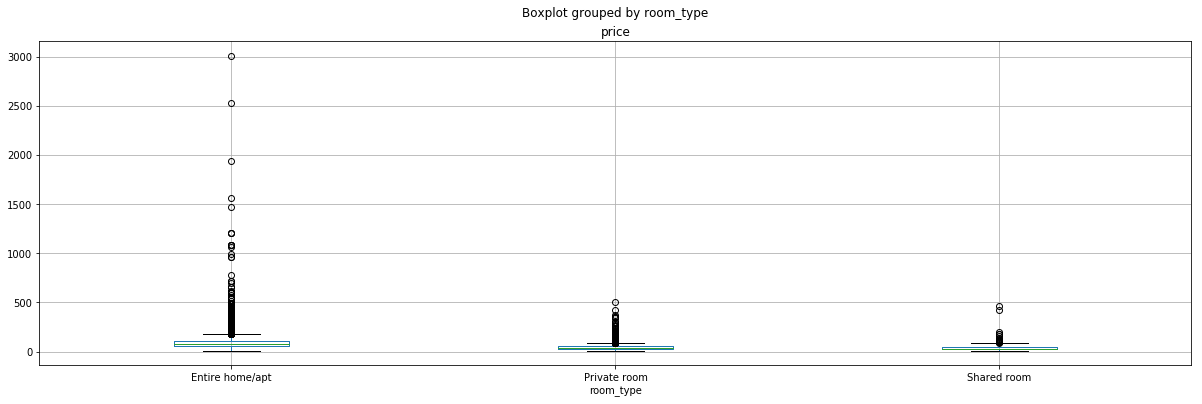

In [50]:
Berlin.boxplot(column = 'price', by = 'room_type', figsize=(20,6))

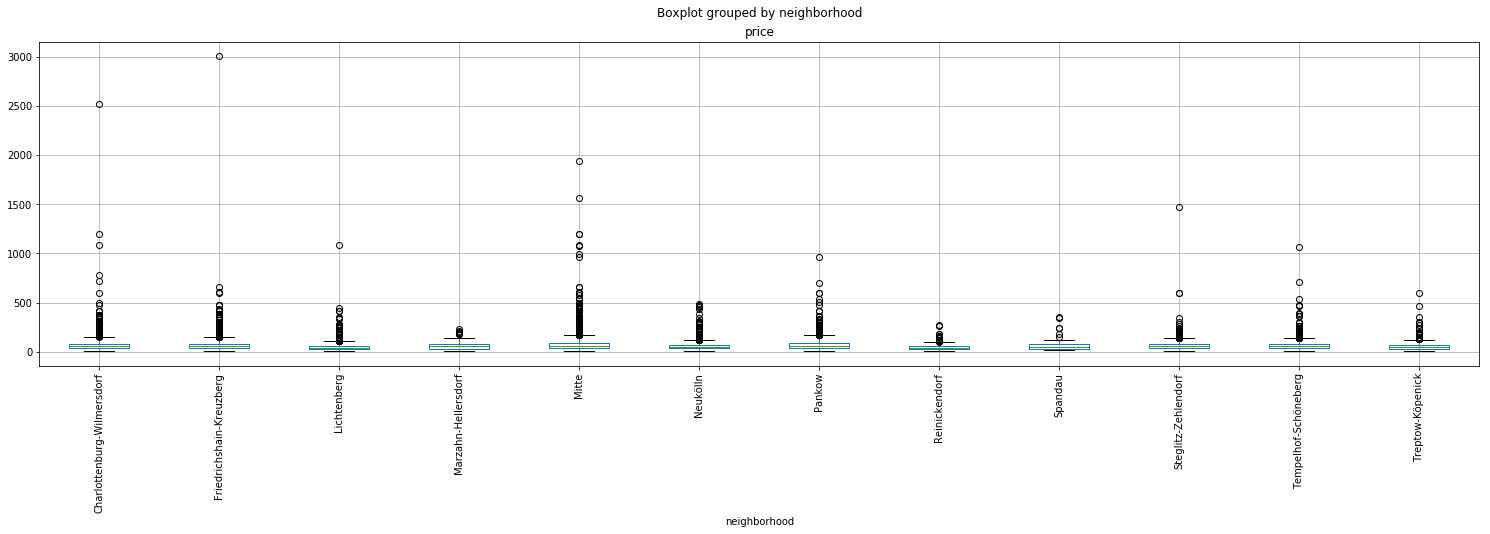

In [52]:
Berlin.boxplot(column='price', by='neighborhood', figsize=(25,6), rot=90);

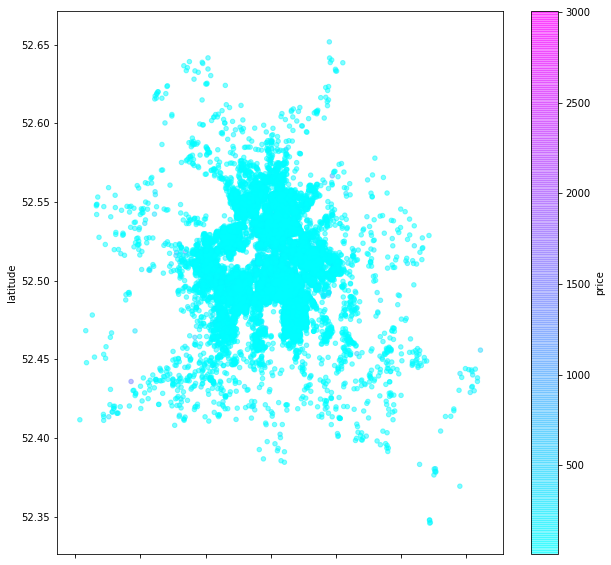

In [61]:
Berlin.plot.scatter(x='longitude', y='latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)

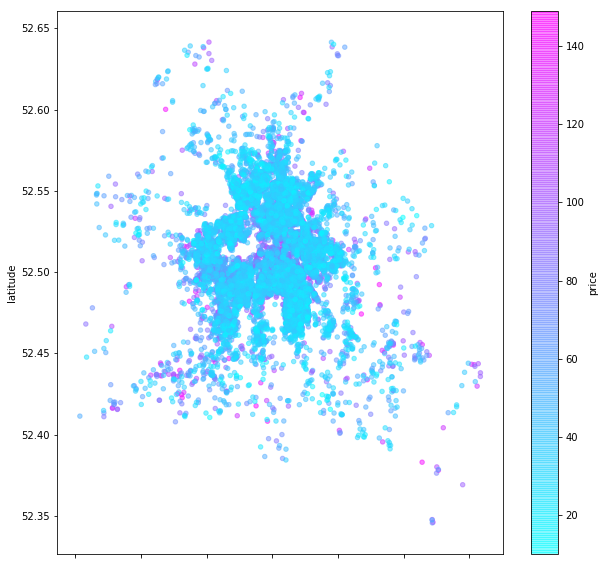

In [64]:
Berlin[Berlin['price']<150].plot.scatter(x='longitude', y='latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)